In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

In [90]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_median.csv')

In [91]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [95]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [96]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [97]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/2000
45/45 [==============================] - 3s 16ms/step - loss: 59.1716 - val_loss: 35.6192
Epoch 2/2000
45/45 [==============================] - 1s 11ms/step - loss: 32.2942 - val_loss: 26.8149
Epoch 3/2000
45/45 [==============================] - 1s 11ms/step - loss: 21.8432 - val_loss: 16.6519
Epoch 4/2000
45/45 [==============================] - 1s 11ms/step - loss: 13.0379 - val_loss: 7.6988
Epoch 5/2000
45/45 [==============================] - 1s 13ms/step - loss: 7.6532 - val_loss: 6.7692
Epoch 6/2000
45/45 [==============================] - 0s 11ms/step - loss: 7.4906 - val_loss: 5.3312
Epoch 7/2000
45/45 [==============================] - 1s 11ms/step - loss: 5.1019 - val_loss: 3.4650
Epoch 8/2000
45/45 [==============================] - 1s 11ms/step - loss: 4.2772 - val_loss: 5.6465
Epoch 9/2000
45/45 [==============================] - 1s 13ms/step - loss: 3.6461 - val_loss: 3.1765
Epoch 10/2000
45/45 [==============================] - 1s 11ms/step - loss: 3.3635 -

In [98]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 0.4382
Mean absolute percentage error: 0.4382246732711792


In [99]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 1s 505ms/step
Predicted WQI: 71.7273


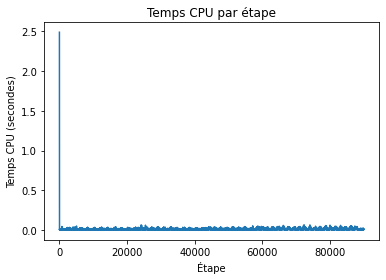

In [100]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le **moyenne**

In [101]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean.csv')

In [102]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [103]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [106]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [107]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [110]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/2000
45/45 [==============================] - 1s 16ms/step - loss: 0.7922 - val_loss: 1.9445
Epoch 2/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.6284 - val_loss: 1.6427
Epoch 3/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.6130 - val_loss: 1.8783
Epoch 4/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.7337 - val_loss: 1.8183
Epoch 5/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.9535 - val_loss: 2.2937
Epoch 6/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.8290 - val_loss: 1.8540
Epoch 7/2000
45/45 [==============================] - 1s 14ms/step - loss: 0.8776 - val_loss: 2.5000
Epoch 8/2000
45/45 [==============================] - 1s 15ms/step - loss: 1.1011 - val_loss: 1.6703
Epoch 9/2000
45/45 [==============================] - 1s 13ms/step - loss: 0.7213 - val_loss: 1.8631
Epoch 10/2000
45/45 [==============================] - 1s 13ms/step - loss: 0.7665 - val_lo

In [111]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 1.9791
Mean absolute percentage error: 1.979109764099121


In [112]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 192ms/step
Predicted WQI: 73.05398


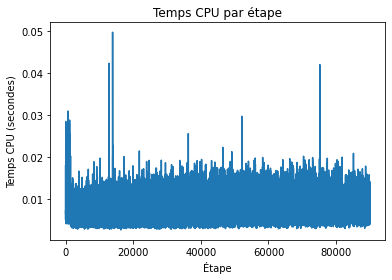

In [113]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par le plus **frequent**

In [4]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_most_frequent.csv')

In [5]:

# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [10]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [11]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])


Epoch 1/2000
45/45 [==============================] - 2s 15ms/step - loss: 72.8870 - val_loss: 39.5272
Epoch 2/2000
45/45 [==============================] - 0s 8ms/step - loss: 36.3296 - val_loss: 32.9368
Epoch 3/2000
45/45 [==============================] - 0s 6ms/step - loss: 29.5838 - val_loss: 25.2315
Epoch 4/2000
45/45 [==============================] - 0s 6ms/step - loss: 22.9356 - val_loss: 21.3784
Epoch 5/2000
45/45 [==============================] - 0s 7ms/step - loss: 18.8924 - val_loss: 16.1629
Epoch 6/2000
45/45 [==============================] - 0s 6ms/step - loss: 14.9614 - val_loss: 14.7748
Epoch 7/2000
45/45 [==============================] - 0s 7ms/step - loss: 12.5693 - val_loss: 10.5900
Epoch 8/2000
45/45 [==============================] - 0s 7ms/step - loss: 10.3527 - val_loss: 9.6855
Epoch 9/2000
45/45 [==============================] - 0s 8ms/step - loss: 7.8362 - val_loss: 5.3374
Epoch 10/2000
45/45 [==============================] - 0s 7ms/step - loss: 4.0249 - 

In [12]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('Mean absolute percentage error:', mae)

12/12 [==============================] - 0s 3ms/step - loss: 0.4874
Mean absolute percentage error: 0.4873806834220886


In [13]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 173ms/step
Predicted WQI: 71.45348


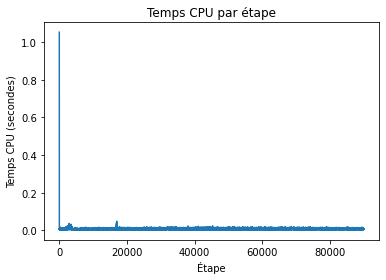

In [14]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()

# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [24]:
# Load the dataset
df = pd.read_csv('water_quality_dataset_mean_state.csv')

In [25]:
# Split the dataset into input (X) and output (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [30]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error')

In [31]:
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test),callbacks=[TimingCallback()])

Epoch 1/2000
42/42 [==============================] - 2s 12ms/step - loss: 72.8379 - val_loss: 41.8443
Epoch 2/2000
42/42 [==============================] - 0s 8ms/step - loss: 39.2924 - val_loss: 35.0446
Epoch 3/2000
42/42 [==============================] - 0s 9ms/step - loss: 31.9640 - val_loss: 27.6346
Epoch 4/2000
42/42 [==============================] - 0s 9ms/step - loss: 25.0356 - val_loss: 21.6991
Epoch 5/2000
42/42 [==============================] - 0s 8ms/step - loss: 20.7728 - val_loss: 18.3443
Epoch 6/2000
42/42 [==============================] - 0s 8ms/step - loss: 17.6364 - val_loss: 16.2334
Epoch 7/2000
42/42 [==============================] - 0s 9ms/step - loss: 16.1537 - val_loss: 14.9667
Epoch 8/2000
42/42 [==============================] - 0s 8ms/step - loss: 15.0346 - val_loss: 14.5677
Epoch 9/2000
42/42 [==============================] - 0s 9ms/step - loss: 14.9993 - val_loss: 15.3113
Epoch 10/2000
42/42 [==============================] - 0s 9ms/step - loss: 13.888

In [32]:
# Evaluate the model
mae = model.evaluate(X_test, y_test)
print('mean_absolute_percentage_error:', mae)

11/11 [==============================] - 0s 4ms/step - loss: 0.2773
mean_absolute_percentage_error: 0.2772846519947052


In [33]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 171ms/step
Predicted WQI: 71.92118


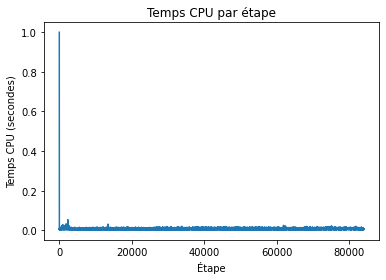

In [34]:
# Créer un graphe pour les temps CPU par epoch
import matplotlib.pyplot as plt

plt.plot(range(len(step_times)), step_times)
plt.xlabel('Étape')
plt.ylabel('Temps CPU (secondes)')
plt.title('Temps CPU par étape')
plt.show()